# 1. Import Libraries and Load Data

Trong phần này, chúng ta sẽ import các thư viện cần thiết (pandas, numpy, matplotlib, seaborn) và đọc dữ liệu từ file `winequality-red.csv` vào DataFrame để chuẩn bị cho các bước phân tích tiếp theo.

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('winequality-red.csv')

# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# 2. Distribution Analysis of Features

Phân tích phân phối của từng đặc trưng (feature) để kiểm tra skewness, kurtosis, missing values, và xác định outliers.

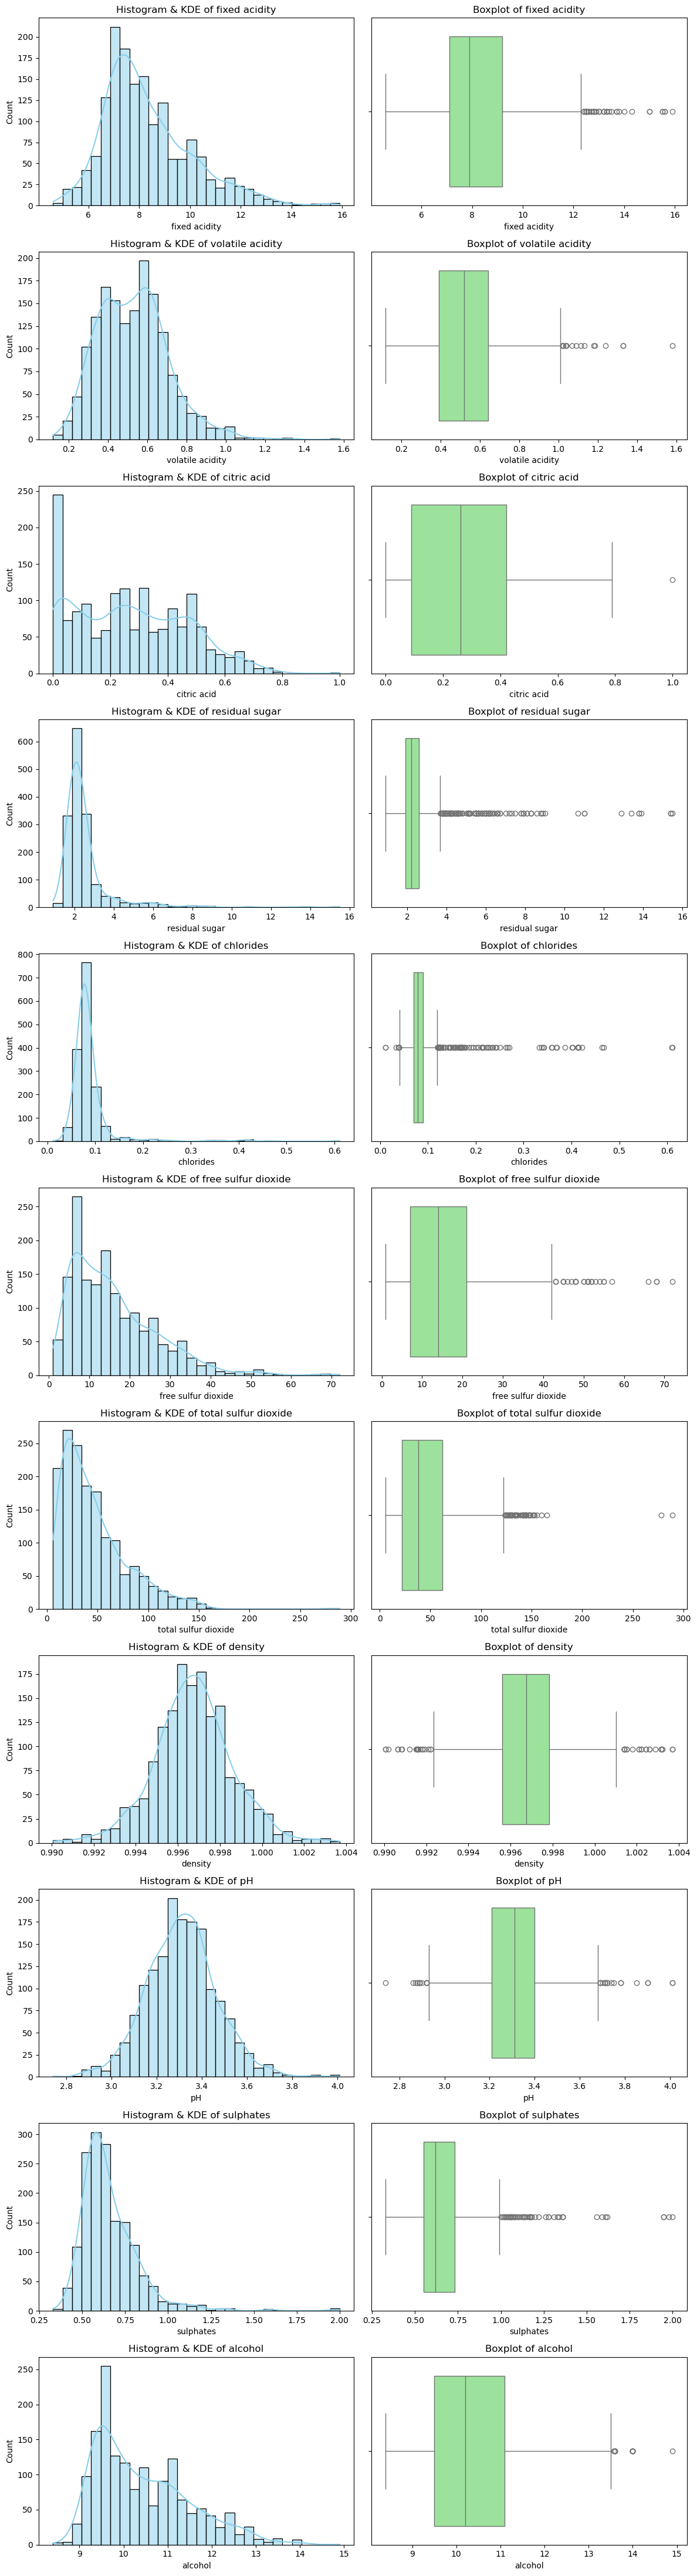

In [3]:
# Danh sách các đặc trưng số
num_features = df.select_dtypes(include=[np.number]).columns.drop('quality')

# Histogram & KDE plot cho từng đặc trưng
fig, axes = plt.subplots(len(num_features), 2, figsize=(12, 4*len(num_features)))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i,0], color='skyblue')
    axes[i,0].set_title(f'Histogram & KDE of {feature}')
    sns.boxplot(x=df[feature], ax=axes[i,1], color='lightgreen')
    axes[i,1].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\3376718099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\3376718099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\3376718099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
C:\Users\ThaiTu\

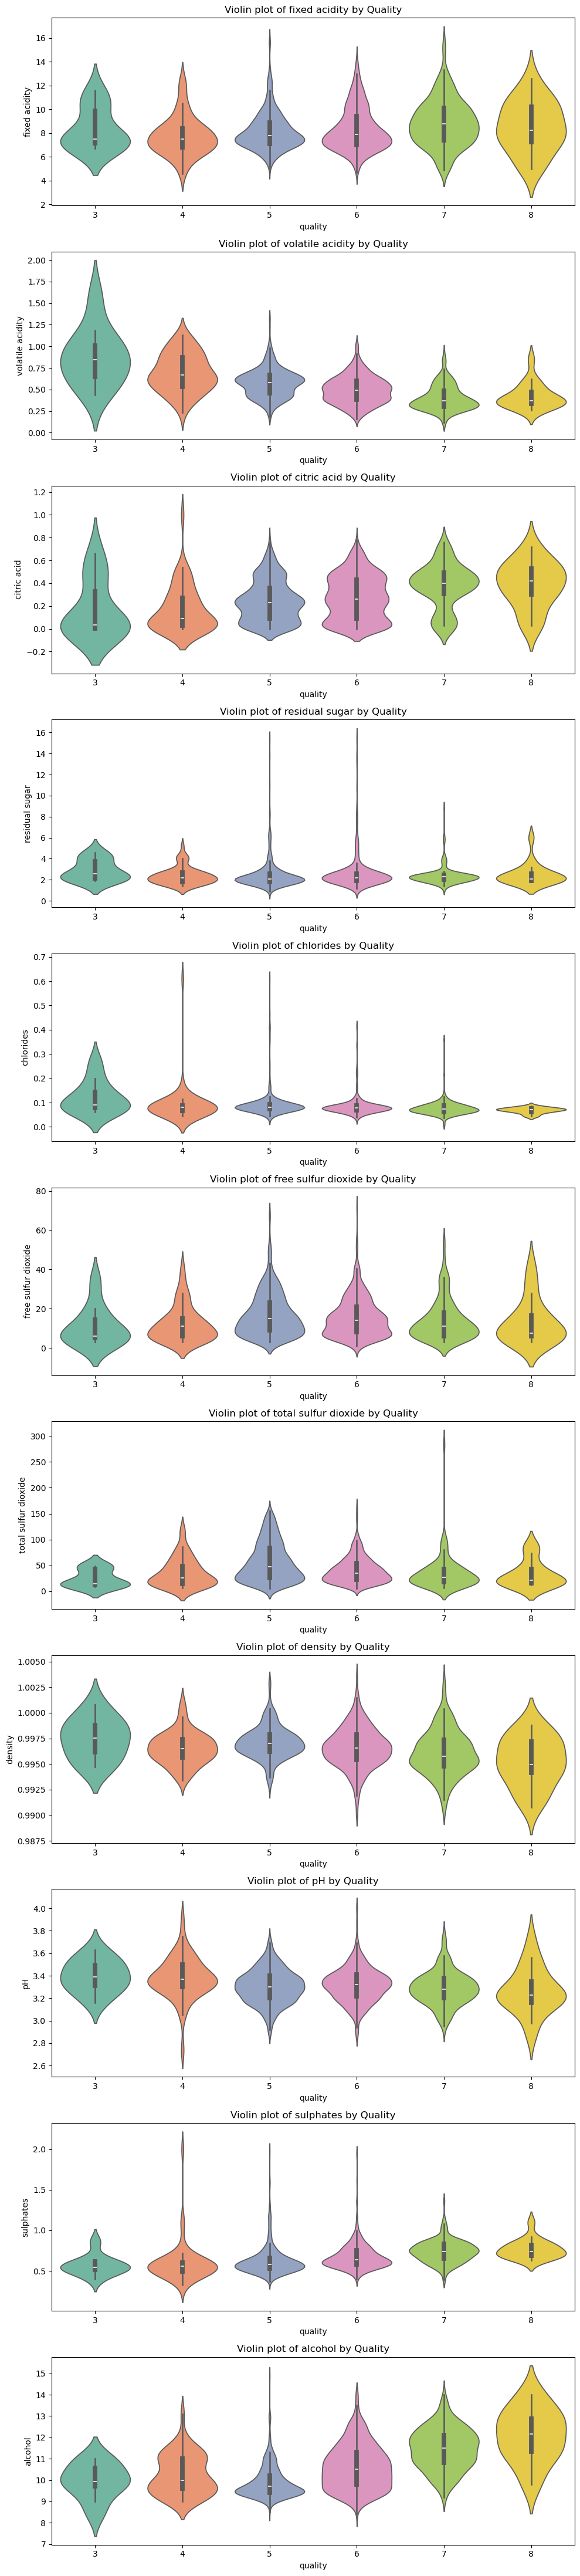

In [24]:
# Violin plot cho từng đặc trưng theo nhóm quality
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 4*len(num_features)))
for i, feature in enumerate(num_features):
    sns.violinplot(x='quality', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Violin plot of {feature} by Quality')
plt.tight_layout()
plt.show()

# 3. Target Variable Distribution Visualization

Trực quan hóa phân phối của nhãn mục tiêu 'quality' 

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\4145747984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set1')


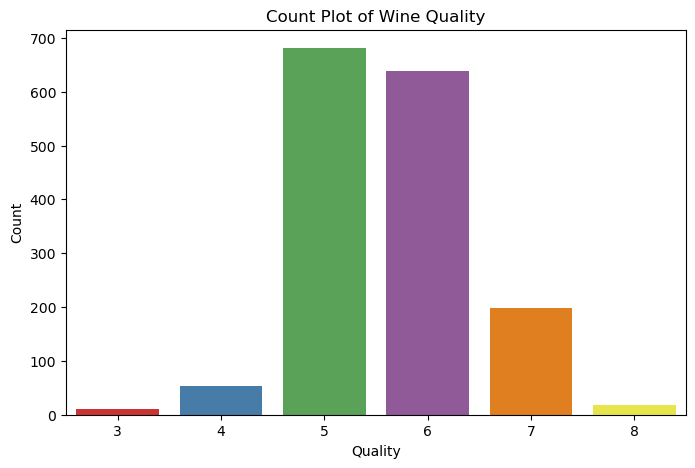

In [7]:
# Count plot cho quality
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='Set1')
plt.title('Count Plot of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# 4. Relationship Analysis Between Features

Phân tích mối quan hệ giữa các đặc trưng và với nhãn mục tiêu

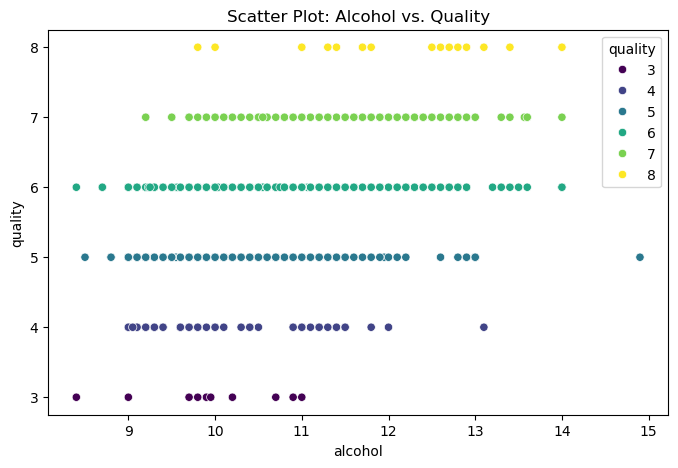

In [25]:
# Scatter plot: alcohol vs. quality
plt.figure(figsize=(8,5))
sns.scatterplot(x='alcohol', y='quality', data=df, hue='quality', palette='viridis')
plt.title('Scatter Plot: Alcohol vs. Quality')
plt.show()

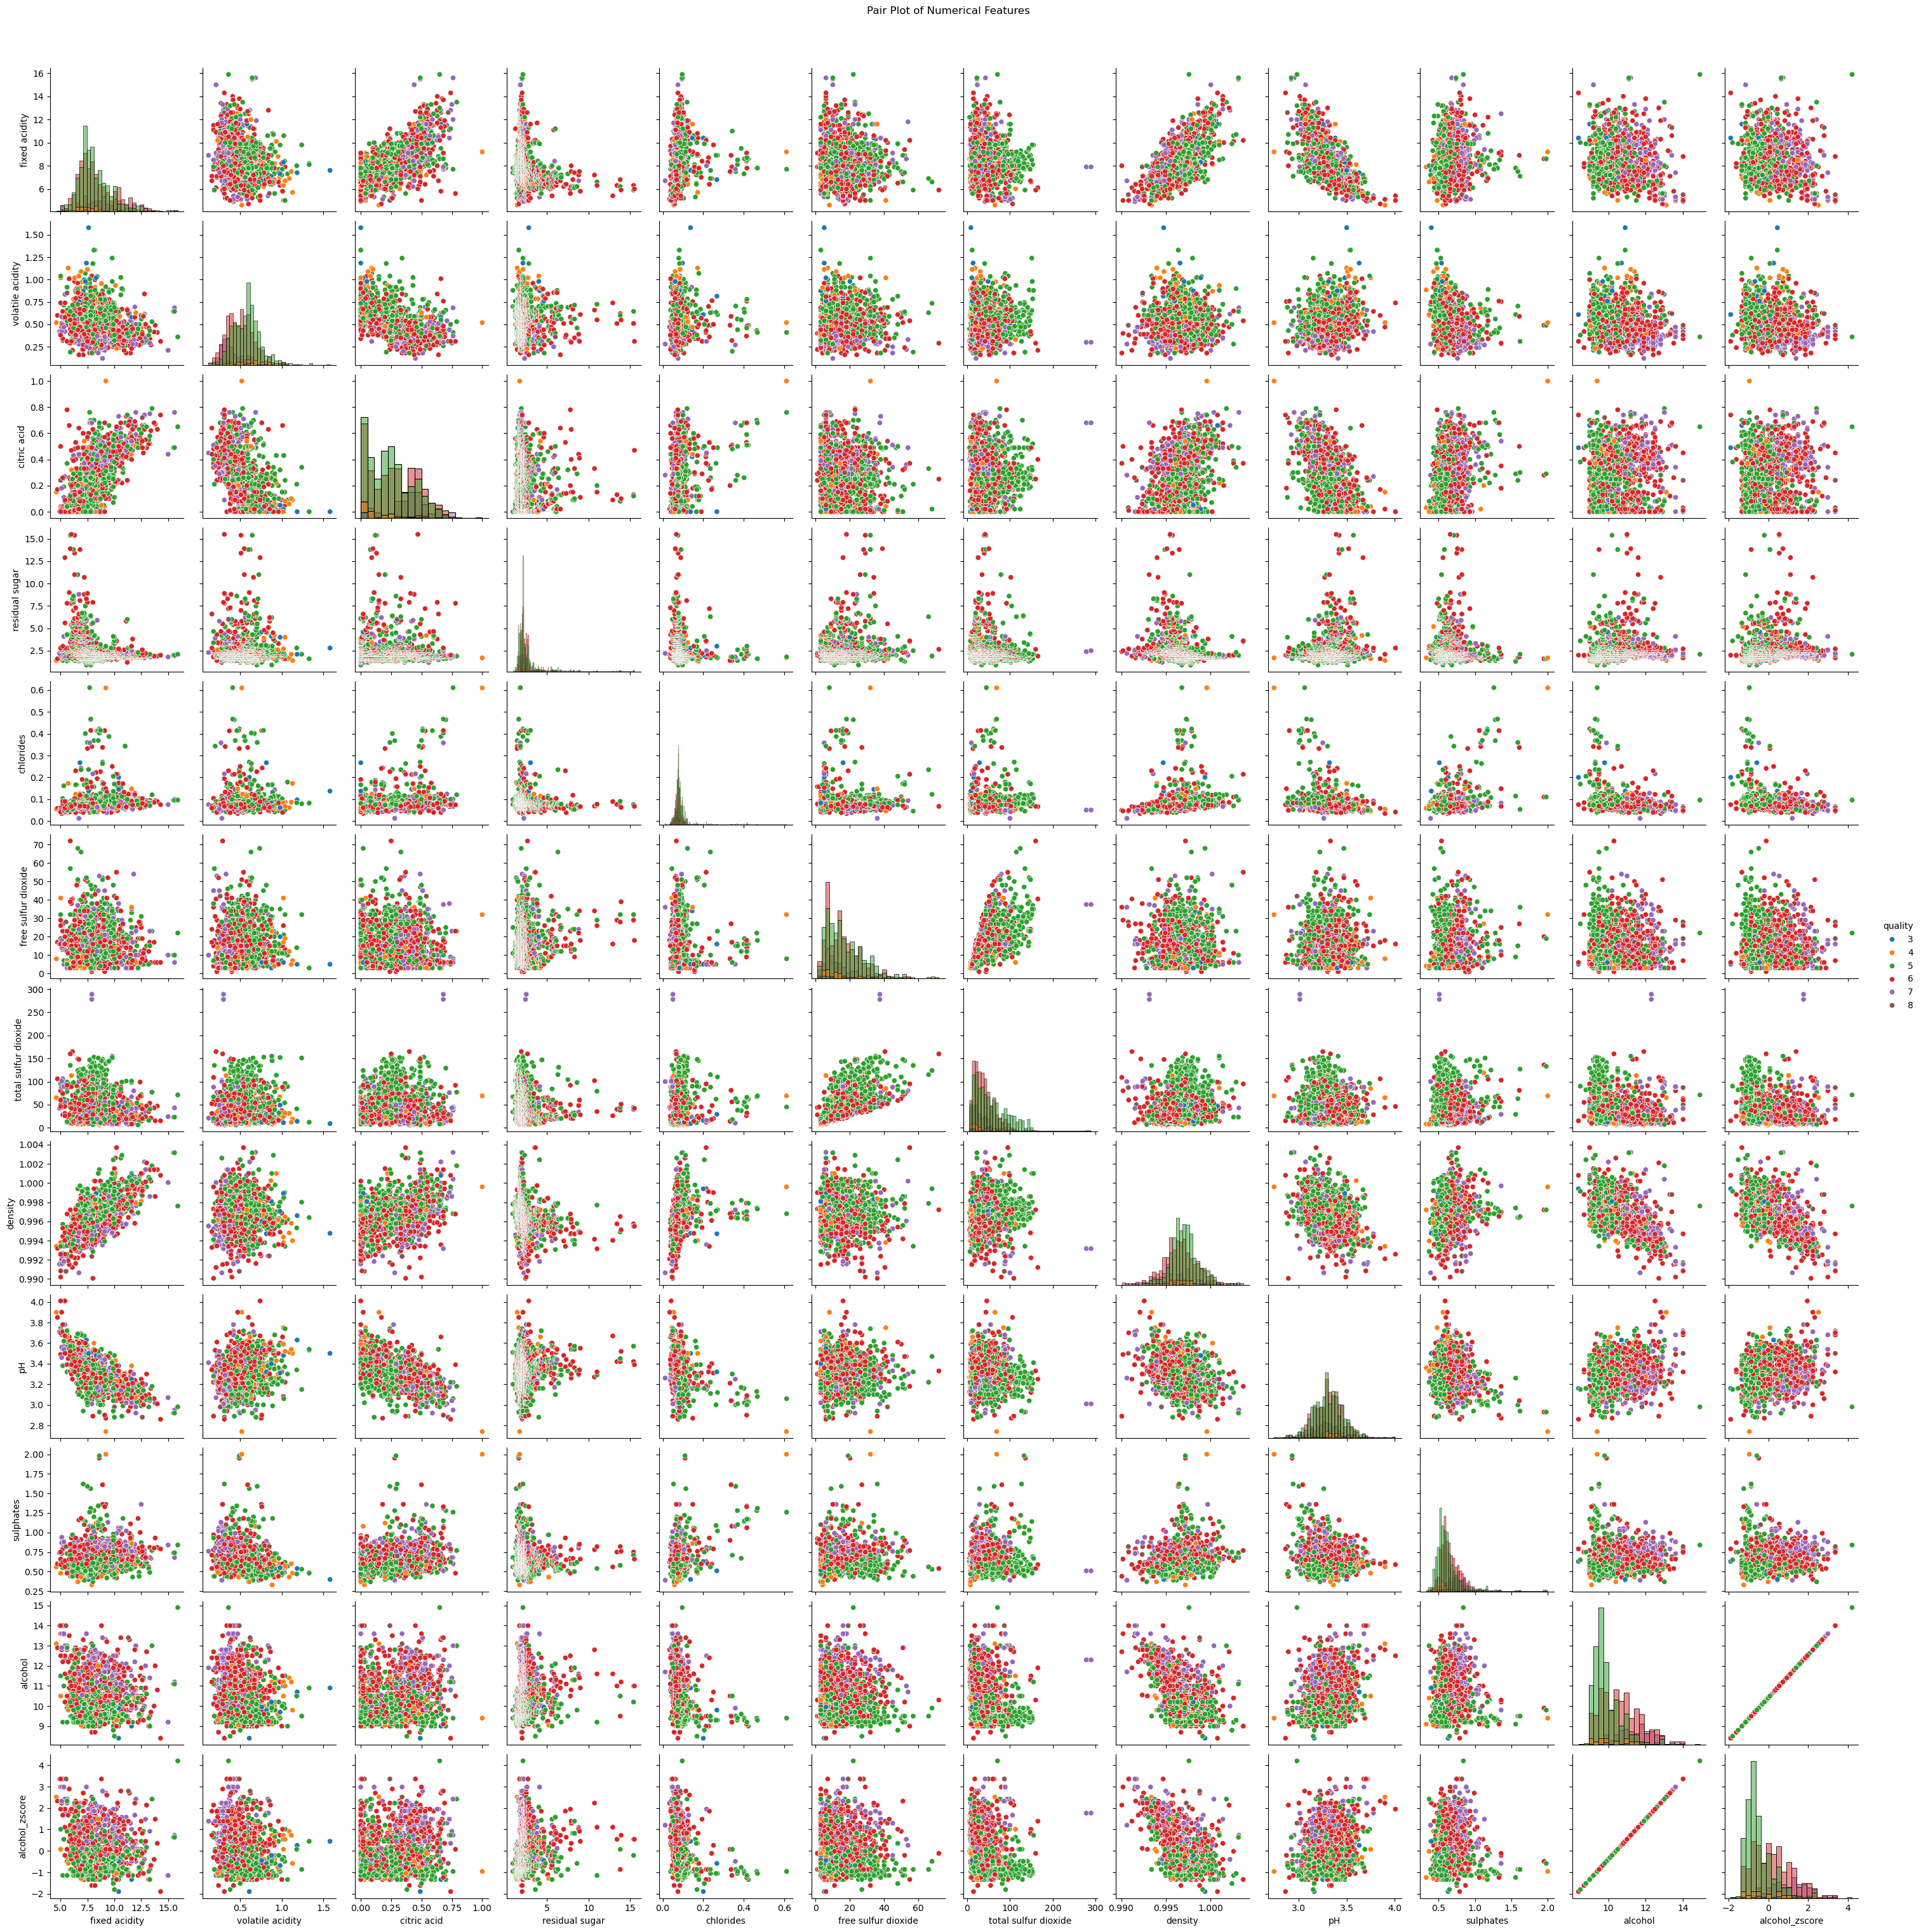

In [26]:
# Pair plot cho tất cả numerical features, hue theo quality
sns.pairplot(df, hue='quality', diag_kind='hist', palette='tab10')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

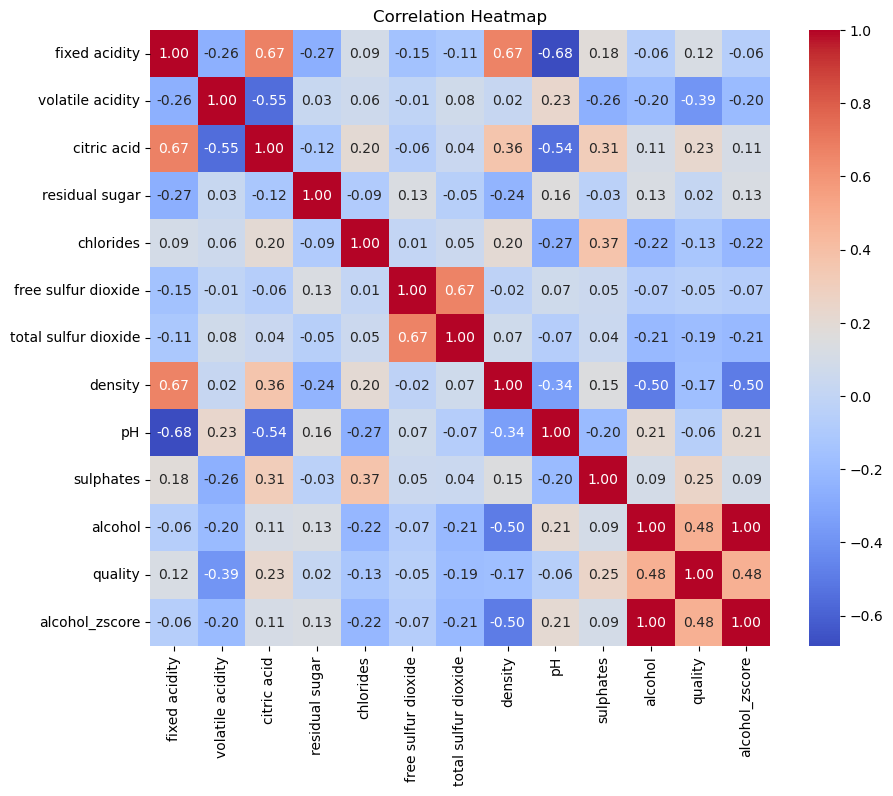

In [27]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 5. Group Comparison Visualizations

So sánh phân phối các đặc trưng giữa các nhóm quality 

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\2639845331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=df, palette='Set2')


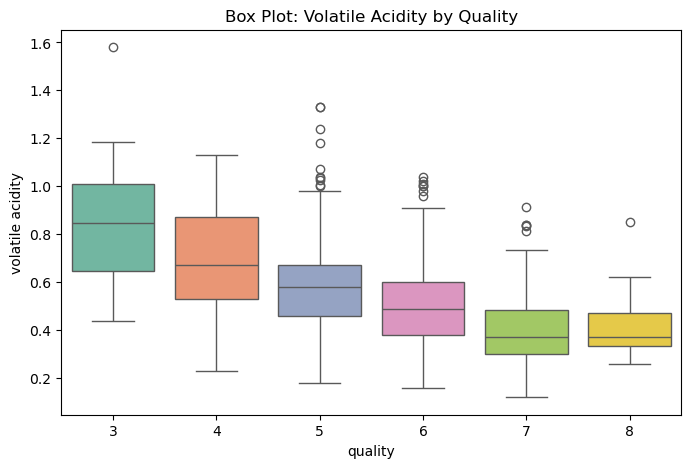

In [13]:
# Grouped box plot: volatile acidity theo quality
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='Set2')
plt.title('Box Plot: Volatile Acidity by Quality')
plt.show()

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\1430229752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='citric acid', data=df, palette='Set3')


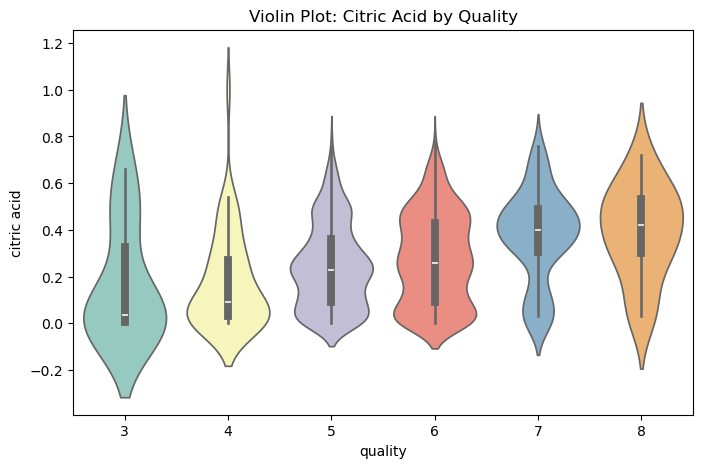

In [14]:
# Grouped violin plot: citric acid theo quality
plt.figure(figsize=(8,5))
sns.violinplot(x='quality', y='citric acid', data=df, palette='Set3')
plt.title('Violin Plot: Citric Acid by Quality')
plt.show()

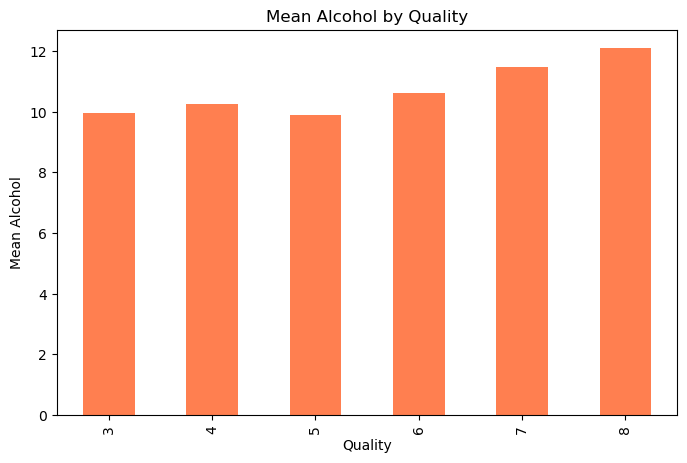

In [15]:
# Bar plot: mean alcohol theo quality
plt.figure(figsize=(8,5))
df.groupby('quality')['alcohol'].mean().plot(kind='bar', color='coral')
plt.title('Mean Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Mean Alcohol')
plt.show()

C:\Users\ThaiTu\AppData\Local\Temp\ipykernel_8096\4050927577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='quality', y='chlorides', data=df, palette='Set1', size=3)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ThaiTu\AppData\Local\Programs\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the s

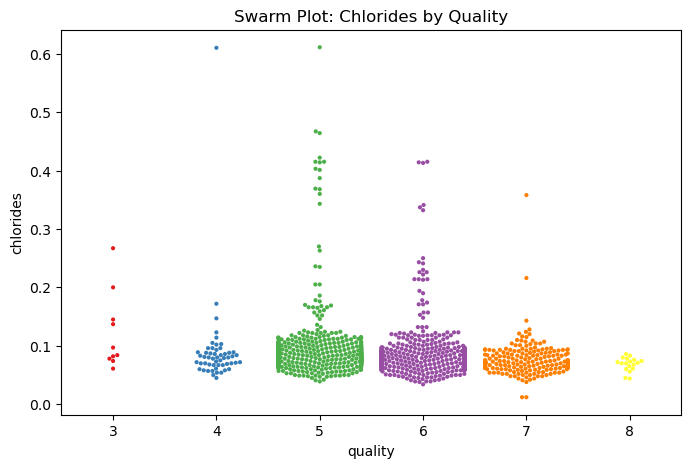

In [16]:
# Swarm plot: chlorides theo quality
plt.figure(figsize=(8,5))
sns.swarmplot(x='quality', y='chlorides', data=df, palette='Set1', size=3)
plt.title('Swarm Plot: Chlorides by Quality')
plt.show()

# 6. Outlier and Anomaly Detection Visualizations

Phát hiện và trực quan hóa các điểm bất thường (outliers) 

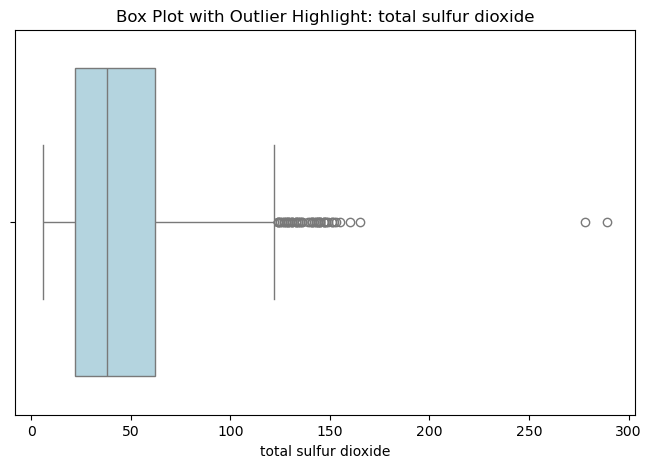

Số lượng outliers của total sulfur dioxide: 55


In [17]:
# Box plot với highlight outliers cho total sulfur dioxide
feature = 'total sulfur dioxide'
plt.figure(figsize=(8,5))
sns.boxplot(x=df[feature], color='lightblue')
plt.title(f'Box Plot with Outlier Highlight: {feature}')
plt.show()

# Tính IQR và highlight outliers
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
print(f"Số lượng outliers của {feature}: {len(outliers)}")

# 7. Advanced and Multidimensional Visualizations

Trực quan hóa đa chiều 

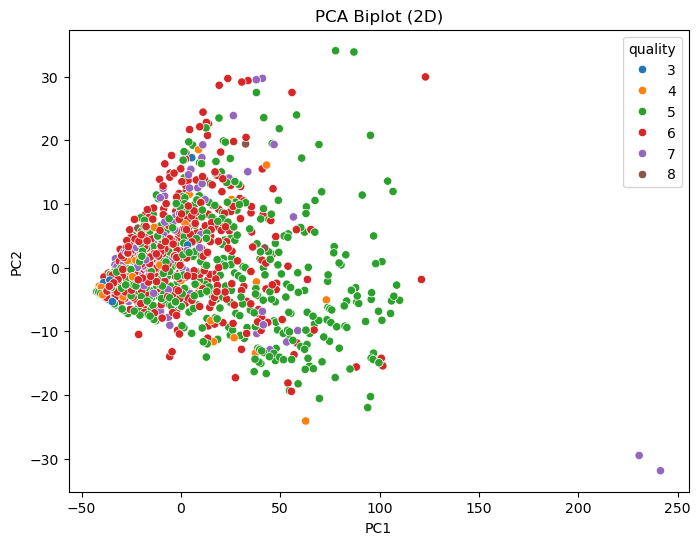

In [19]:
# PCA Biplot
from sklearn.decomposition import PCA
features = num_features
X = df[features].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['quality'], palette='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot (2D)')
plt.show()

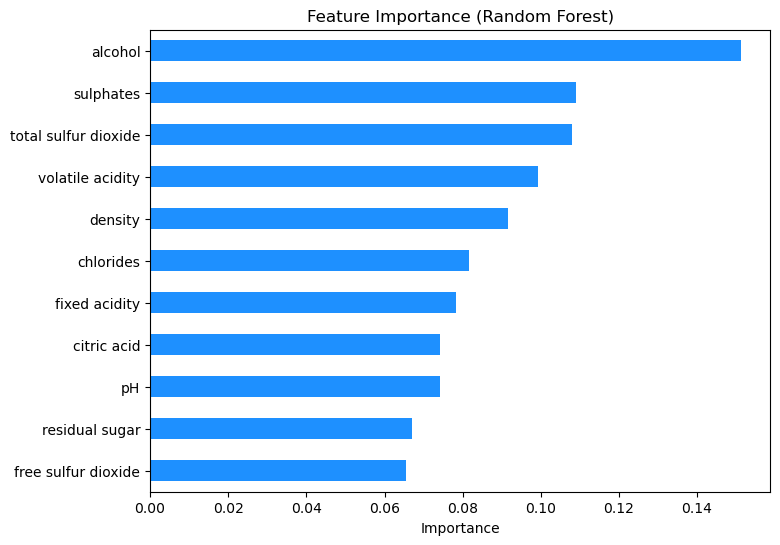

In [20]:
# Feature importance bar từ Random Forest
from sklearn.ensemble import RandomForestClassifier
X = df[num_features]
y = df['quality']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=num_features)
importances.sort_values().plot(kind='barh', color='dodgerblue', figsize=(8,6))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()